In [1]:
import tensorflow as tf
from tensorflow.keras.callbacks import *
import tensorflow.keras as keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
image_size = (150, 150)
batch_size=10
epochs = 10

In [3]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory("/kaggle/input/nasalpolypdataset/nasal polyp",  image_size=image_size,
                                                             batch_size=batch_size, validation_split=0.2,
                                                             subset="training",
                                                             seed=1337)
val_ds = tf.keras.preprocessing.image_dataset_from_directory("/kaggle/input/nasalpolypdataset/nasal polyp", image_size=image_size,
                                                             batch_size=batch_size, validation_split=0.2,
                                                             subset="validation",
                                                             seed=1337)

Found 1000 files belonging to 2 classes.
Using 800 files for training.
Found 1000 files belonging to 2 classes.
Using 200 files for validation.


In [4]:
base = keras.applications.MobileNetV2(
    include_top=False,
    weights='imagenet',
    input_shape=(150, 150, 3)
)

base.trainable = False

inputs = keras.Input(shape=(150, 150, 3))
x = base(inputs, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
outputs = keras.layers.Dense(1, activation='sigmoid')(x)

model = keras.Model(inputs, outputs)
model.summary()

9406464/9406464 [==============================] - 1s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 mobilenetv2_1.00_224 (Func  (None, 5, 5, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d (  (None, 1280)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 1)                 1281      
                                                                 
Total params: 2259265 (8.62 MB)
Trainable params: 1281 (5.00 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________

In [5]:
model.compile(
    optimizer=keras.optimizers.Adam(0.001),
    loss=keras.losses.BinaryCrossentropy(),
    metrics=[keras.metrics.BinaryAccuracy(), keras.metrics.Recall(), keras.metrics.Precision()],
)

In [6]:
history = keras.callbacks.History()

In [7]:
model.fit(
    train_ds,
    epochs=epochs,
    callbacks=[history],
    batch_size=batch_size,
    validation_data=(val_ds),
    shuffle=True
)

Epoch 1/10
80/80 [==============================] - 15s 134ms/step - loss: 0.6744 - binary_accuracy: 0.6475 - recall: 0.1610 - precision: 0.3115 - val_loss: 0.6796 - val_binary_accuracy: 0.6150 - val_recall: 0.0938 - val_precision: 0.2400
Epoch 2/10
80/80 [==============================] - 9s 110ms/step - loss: 0.6228 - binary_accuracy: 0.6900 - recall: 0.1314 - precision: 0.4189 - val_loss: 0.6935 - val_binary_accuracy: 0.5600 - val_recall: 0.2188 - val_precision: 0.2692
Epoch 3/10
80/80 [==============================] - 9s 115ms/step - loss: 0.6106 - binary_accuracy: 0.6913 - recall: 0.1483 - precision: 0.4321 - val_loss: 0.6751 - val_binary_accuracy: 0.6700 - val_recall: 0.0312 - val_precision: 0.3333
Epoch 4/10
80/80 [==============================] - 9s 112ms/step - loss: 0.5887 - binary_accuracy: 0.7000 - recall: 0.1483 - precision: 0.4730 - val_loss: 0.6673 - val_binary_accuracy: 0.6400 - val_recall: 0.1406 - val_precision: 0.3462
Epoch 5/10
80/80 [=============================

In [8]:
df = pd.DataFrame.from_dict(history.history)
df

,loss,binary_accuracy,recall,precision,val_loss,val_binary_accuracy,val_recall,val_precision
0,0.674417,0.64750,0.161017,0.311475,0.679575,0.615,0.093750,0.240000
1,0.622788,0.69000,0.131356,0.418919,0.693456,0.560,0.218750,0.269231
2,0.610575,0.69125,0.148305,0.432099,0.675065,0.670,0.031250,0.333333
3,0.588704,0.70000,0.148305,0.472973,0.667271,0.640,0.140625,0.346154
4,0.577678,0.71125,0.156780,0.536232,0.664979,0.680,0.125000,0.500000
5,0.548293,0.72625,0.156780,0.649123,0.726508,0.680,0.015625,0.500000
6,0.556423,0.72125,0.161017,0.603175,0.669451,0.680,0.125000,0.500000
7,0.529871,0.73375,0.203390,0.657534,0.667756,0.680,0.109375,0.500000
8,0.550483,0.71000,0.245763,0.517857,0.672654,0.660,0.156250,0.416667
9,0.524566,0.74625,0.250000,0.694118,0.689794,0.675,0.062500,0.444444


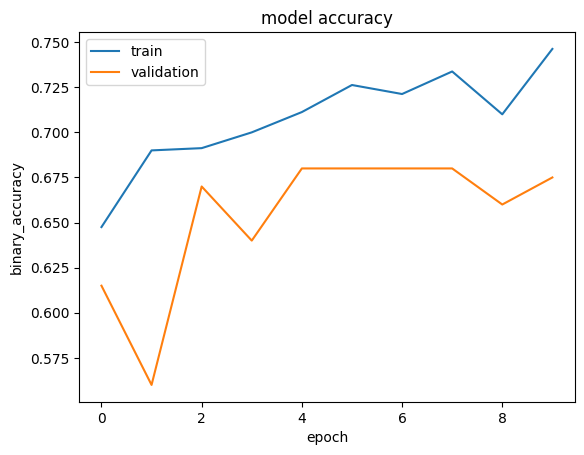

In [9]:
plt.plot(history.history['binary_accuracy'])
plt.plot(history.history['val_binary_accuracy'])
plt.title('model accuracy')
plt.ylabel('binary_accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
print("")

1/1 [==============================] - 1s 1s/step


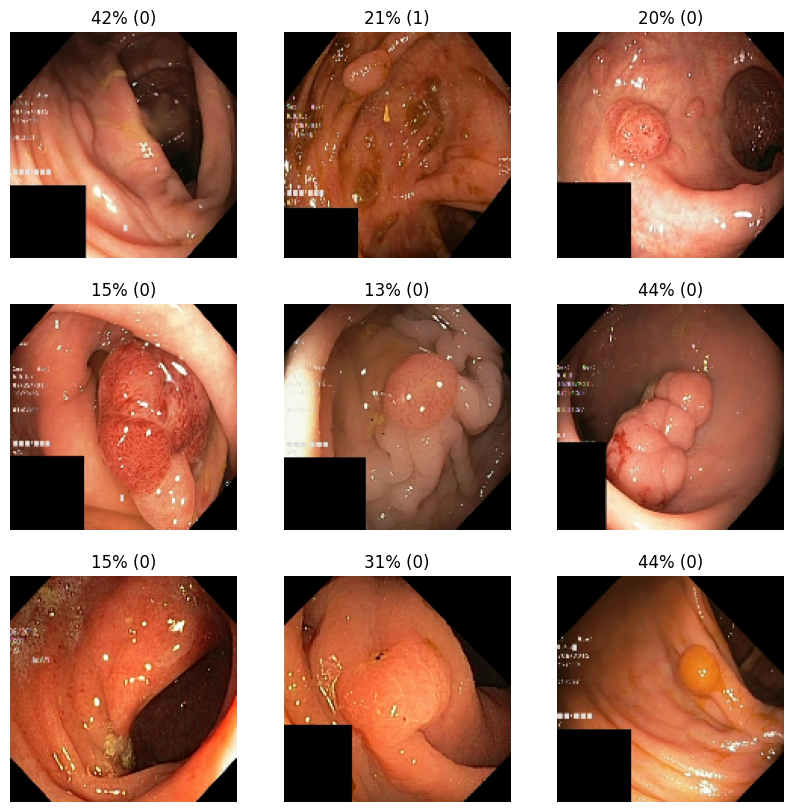

In [10]:
plt.figure(figsize=(10, 10))
for images, labels in val_ds.take(1):
    predicts = model.predict(images)
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        percentage = int(predicts[i][0] * 100)
        plt.title(f'{percentage}% ({int(labels[i])})')
        plt.axis("off")

plt.show()